In [ ]:
import cv2 
# path 
path = "Chess2.png"
  
# Reading an image in default mode 
image = cv2.imread(path) 
  
# Window name in which image is displayed 
window_name = 'image'
  
# Using cv2.imshow() method 
# Displaying the image 
cv2.imshow(window_name, image) 
  
# waits for user to press any key 
# (this is necessary to avoid Python kernel form crashing) 
cv2.waitKey(0) 
  
# closing all open windows 
# cv2.destroyAllWindows() 

In [ ]:
import cv2 as cv
img = cv.imread('Chess2.png')
while True: 
    cv.imshow('ImageDisplay',img)
    if cv.waitKey(20) & 0xFF == ord('d'):
        break
cv.destroyAllWindows()

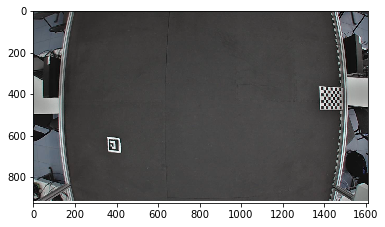

In [1]:
from matplotlib import pyplot as plt
import cv2
image = cv2.imread('Chess2.png')
plt.imshow(image)
plt.show()

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import glob
marker_dict = cv.aruco.getPredefinedDictionary(cv.aruco.DICT_4X4_250)
param_markers = cv.aruco.DetectorParameters()
detector = cv.aruco.ArucoDetector(marker_dict, param_markers)
cap = cv.imread('calib_radial.jpg')
array = np.array(cap)
print(array)
 

[[[ 69  69  69]
  [ 68  68  68]
  [ 67  67  67]
  ...
  [ 88  88  88]
  [ 90  90  90]
  [ 92  92  92]]

 [[ 70  70  70]
  [ 69  69  69]
  [ 68  68  68]
  ...
  [ 88  88  88]
  [ 90  90  90]
  [ 92  92  92]]

 [[ 70  70  70]
  [ 69  69  69]
  [ 68  68  68]
  ...
  [ 88  88  88]
  [ 90  90  90]
  [ 92  92  92]]

 ...

 [[219 219 219]
  [239 239 239]
  [238 238 238]
  ...
  [ 90  90  90]
  [ 89  89  89]
  [ 88  88  88]]

 [[167 167 167]
  [199 199 199]
  [216 216 216]
  ...
  [ 85  85  85]
  [ 84  84  84]
  [ 83  83  83]]

 [[  0   0   0]
  [  4   4   4]
  [  3   3   3]
  ...
  [  1   1   1]
  [  0   0   0]
  [  0   0   0]]]


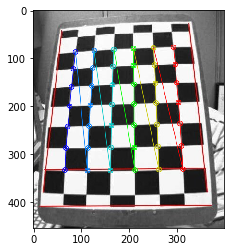

True

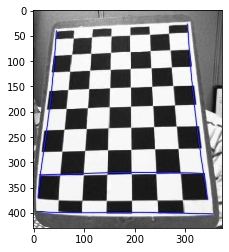

In [8]:
ret = True
frame = array
gray_frame = cv.cvtColor(frame, cv.COLOR_RGB2BGR)
plt.imshow(gray_frame)
(corners, ids, rejected) = detector.detectMarkers(gray_frame)
output_frame = cv.aruco.drawDetectedMarkers(gray_frame, corners, ids)
plt.imshow(output_frame)
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
 
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
 
# images = glob.glob('Chess2.png')
images = output_frame
 
for i in range(1):
    img = output_frame
    # print("photo 1")
    # print(img)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

    corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
    imgpoints.append(corners2)

# Draw and display the corners
new_img = cv.drawChessboardCorners(img, (7,6), corners2, ret)
# print("photo 2")
# print(img)
plt.imshow(new_img)
plt.show()
# cv.imshow('Mar', img)
# cv.waitKey(0)
 
# cv.destroyAllWindows()
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# img = cv.imread('left12.jpg')
img = frame
h, w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
 
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
# cv.imwrite('calibresult.png', dst)
plt.imshow(dst)
cv.imwrite("filaname.png",dst)